In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import plotly.express as px
import seaborn as sns


c:\Users\Mouadh Fraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [49]:
df = pd.read_excel(r'D:\pcd\archive\MINI-DDSM-Complete-JPEG-8\DataWMask.xlsx')
df[4982:5003]

,fullPath,fileName,View,Side,Status,Tumour_Contour,Tumour_Contour2,Age,Density
4982,Cancer\3511\B_3511_1.RIGHT_CC.jpg,B_3511_1.RIGHT_CC.jpg,CC,RIGHT,Cancer,Cancer\3511\B_3511_1.RIGHT_CC_Mask.jpg,Cancer\3511\B_3511_1.RIGHT_CC_MASK2.jpg,81.0,2
4983,Cancer\3511\B_3511_1.RIGHT_MLO.jpg,B_3511_1.RIGHT_MLO.jpg,MLO,RIGHT,Cancer,Cancer\3511\B_3511_1.RIGHT_MLO_Mask.jpg,Cancer\3511\B_3511_1.RIGHT_MLO_MASK2.jpg,81.0,2
4984,Cancer\3512\B_3512_1.LEFT_CC.jpg,B_3512_1.LEFT_CC.jpg,CC,LEFT,Cancer,Cancer\3512\B_3512_1.LEFT_CC_Mask.jpg,-,83.0,2
4985,Cancer\3512\B_3512_1.LEFT_MLO.jpg,B_3512_1.LEFT_MLO.jpg,MLO,LEFT,Cancer,Cancer\3512\B_3512_1.LEFT_MLO_Mask.jpg,-,83.0,2
4986,Cancer\3512\B_3512_1.RIGHT_CC.jpg,B_3512_1.RIGHT_CC.jpg,CC,RIGHT,Cancer,-,-,83.0,2
4987,Cancer\3512\B_3512_1.RIGHT_MLO.jpg,B_3512_1.RIGHT_MLO.jpg,MLO,RIGHT,Cancer,-,-,83.0,2
4988,Cancer\3513\B_3513_1.LEFT_CC.jpg,B_3513_1.LEFT_CC.jpg,CC,LEFT,Cancer,-,-,81.0,3
4989,Cancer\3513\B_3513_1.LEFT_MLO.jpg,B_3513_1.LEFT_MLO.jpg,MLO,LEFT,Cancer,Cancer\3513\B_3513_1.LEFT_MLO_Mask.jpg,-,81.0,3
4990,Cancer\3513\B_3513_1.RIGHT_CC.jpg,B_3513_1.RIGHT_CC.jpg,CC,RIGHT,Cancer,Cancer\3513\B_3513_1.RIGHT_CC_Mask.jpg,Cancer\3513\B_3513_1.RIGHT_CC_MASK2.jpg,81.0,3
4991,Cancer\3513\B_3513_1.RIGHT_MLO.jpg,B_3513_1.RIGHT_MLO.jpg,MLO,RIGHT,Cancer,Cancer\3513\B_3513_1.RIGHT_MLO_Mask.jpg,Cancer\3513\B_3513_1.RIGHT_MLO_MASK2.jpg,81.0,3


In [50]:
d=df[df.Tumour_Contour2!='-']
len(d)

234

In [5]:
df_concat = df[['fileName', 'Status', 'fullPath', 'Tumour_Contour']]
text_labels = df_concat['Status'].values
df_concat = df_concat.loc[(df_concat['Status']=='Benign') | (df_concat['Status']=='Cancer')]
df_concat

,fileName,Status,fullPath,Tumour_Contour
0,C_0029_1.LEFT_CC.jpg,Benign,Benign\0029\C_0029_1.LEFT_CC.jpg,Benign\0029\C_0029_1.LEFT_CC_Mask.jpg
1,C_0029_1.LEFT_MLO.jpg,Benign,Benign\0029\C_0029_1.LEFT_MLO.jpg,Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg
2,C_0029_1.RIGHT_CC.jpg,Benign,Benign\0029\C_0029_1.RIGHT_CC.jpg,-
3,C_0029_1.RIGHT_MLO.jpg,Benign,Benign\0029\C_0029_1.RIGHT_MLO.jpg,-
4,C_0033_1.LEFT_CC.jpg,Benign,Benign\0033\C_0033_1.LEFT_CC.jpg,-
...,...,...,...,...
5395,D_4193_1.RIGHT_MLO.jpg,Cancer,Cancer\4193\D_4193_1.RIGHT_MLO.jpg,-
5396,D_4199_1.LEFT_CC.jpg,Cancer,Cancer\4199\D_4199_1.LEFT_CC.jpg,-
5397,D_4199_1.LEFT_MLO.jpg,Cancer,Cancer\4199\D_4199_1.LEFT_MLO.jpg,-
5398,D_4199_1.RIGHT_CC.jpg,Cancer,Cancer\4199\D_4199_1.RIGHT_CC.jpg,Cancer\4199\D_4199_1.RIGHT_CC_Mask.jpg


In [6]:
label_map = {"Benign": 0, "Cancer": 1}
text_labels = df_concat['Status'].values

def apply_mapping(label):
    return label_map.get(label, -1)

int_labels = list(map(apply_mapping, text_labels))

df_concat['labels'] = int_labels
df_concat

,fileName,Status,fullPath,Tumour_Contour,labels
0,C_0029_1.LEFT_CC.jpg,Benign,Benign\0029\C_0029_1.LEFT_CC.jpg,Benign\0029\C_0029_1.LEFT_CC_Mask.jpg,0
1,C_0029_1.LEFT_MLO.jpg,Benign,Benign\0029\C_0029_1.LEFT_MLO.jpg,Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg,0
2,C_0029_1.RIGHT_CC.jpg,Benign,Benign\0029\C_0029_1.RIGHT_CC.jpg,-,0
3,C_0029_1.RIGHT_MLO.jpg,Benign,Benign\0029\C_0029_1.RIGHT_MLO.jpg,-,0
4,C_0033_1.LEFT_CC.jpg,Benign,Benign\0033\C_0033_1.LEFT_CC.jpg,-,0
...,...,...,...,...,...
5395,D_4193_1.RIGHT_MLO.jpg,Cancer,Cancer\4193\D_4193_1.RIGHT_MLO.jpg,-,1
5396,D_4199_1.LEFT_CC.jpg,Cancer,Cancer\4199\D_4199_1.LEFT_CC.jpg,-,1
5397,D_4199_1.LEFT_MLO.jpg,Cancer,Cancer\4199\D_4199_1.LEFT_MLO.jpg,-,1
5398,D_4199_1.RIGHT_CC.jpg,Cancer,Cancer\4199\D_4199_1.RIGHT_CC.jpg,Cancer\4199\D_4199_1.RIGHT_CC_Mask.jpg,1


In [7]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 5399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fileName        5400 non-null   object
 1   Status          5400 non-null   object
 2   fullPath        5400 non-null   object
 3   Tumour_Contour  5400 non-null   object
 4   labels          5400 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 253.1+ KB


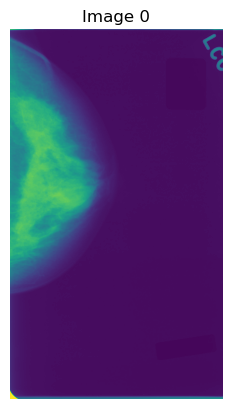

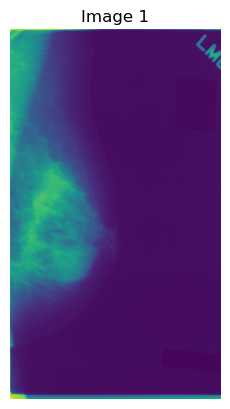

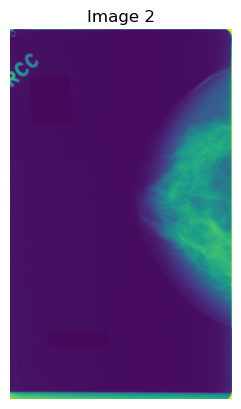

In [12]:

x = 3
for index, row in df_concat.iterrows():
    if x > 0:
       
        image_path = row['fullPath']
        image = Image.open(image_path)
        
        plt.imshow(image)  
        plt.title("Image {}".format(index))
        plt.axis('off')  
        plt.show()
        x = x- 1


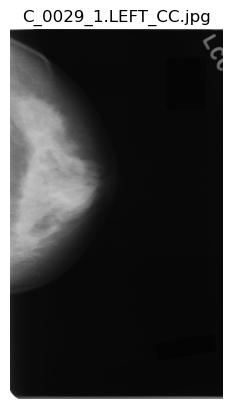

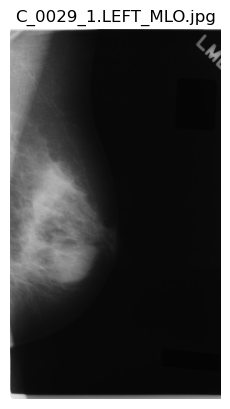

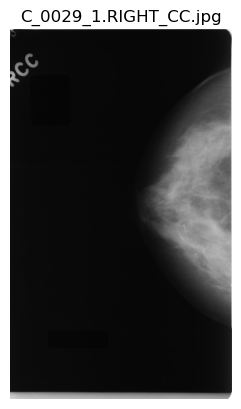

In [13]:

y= 3
for index, row in df_concat.iterrows():
    if y > 0:
        image_path = row['fullPath']
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        label=row['fileName']
        plt.title(label )
        
        plt.axis('off')
        plt.show()

        
        y = y - 1






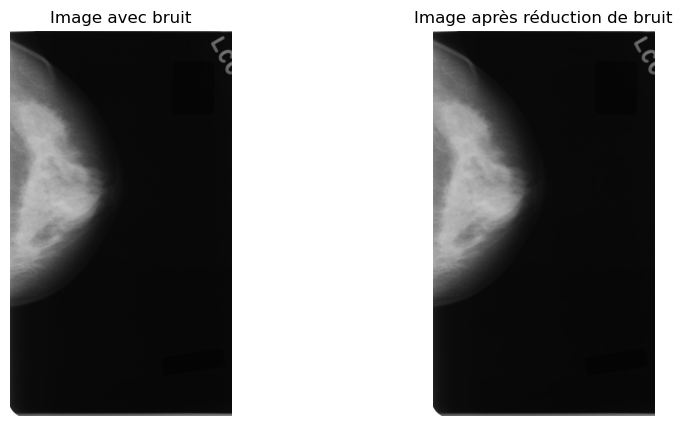

In [14]:

image = cv2.imread(r'D:\pcd\archive\MINI-DDSM-Complete-JPEG-8\Benign\0029\C_0029_1.LEFT_CC.jpg')
image_denoised = cv2.medianBlur(image, 5) 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image avec bruit')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_denoised, cv2.COLOR_BGR2RGB))
plt.title('Image après réduction de bruit')
plt.axis('off')

plt.show()


In [15]:
df_concat

,fileName,Status,fullPath,Tumour_Contour,labels
0,C_0029_1.LEFT_CC.jpg,Benign,Benign\0029\C_0029_1.LEFT_CC.jpg,Benign\0029\C_0029_1.LEFT_CC_Mask.jpg,0
1,C_0029_1.LEFT_MLO.jpg,Benign,Benign\0029\C_0029_1.LEFT_MLO.jpg,Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg,0
2,C_0029_1.RIGHT_CC.jpg,Benign,Benign\0029\C_0029_1.RIGHT_CC.jpg,-,0
3,C_0029_1.RIGHT_MLO.jpg,Benign,Benign\0029\C_0029_1.RIGHT_MLO.jpg,-,0
4,C_0033_1.LEFT_CC.jpg,Benign,Benign\0033\C_0033_1.LEFT_CC.jpg,-,0
...,...,...,...,...,...
5395,D_4193_1.RIGHT_MLO.jpg,Cancer,Cancer\4193\D_4193_1.RIGHT_MLO.jpg,-,1
5396,D_4199_1.LEFT_CC.jpg,Cancer,Cancer\4199\D_4199_1.LEFT_CC.jpg,-,1
5397,D_4199_1.LEFT_MLO.jpg,Cancer,Cancer\4199\D_4199_1.LEFT_MLO.jpg,-,1
5398,D_4199_1.RIGHT_CC.jpg,Cancer,Cancer\4199\D_4199_1.RIGHT_CC.jpg,Cancer\4199\D_4199_1.RIGHT_CC_Mask.jpg,1


In [16]:
class_benign = df_concat[df_concat['labels'] == 0]['fullPath']

class_benign

0         Benign\0029\C_0029_1.LEFT_CC.jpg
1        Benign\0029\C_0029_1.LEFT_MLO.jpg
2        Benign\0029\C_0029_1.RIGHT_CC.jpg
3       Benign\0029\C_0029_1.RIGHT_MLO.jpg
4         Benign\0033\C_0033_1.LEFT_CC.jpg
                       ...                
2679    Benign\4196\D_4196_1.RIGHT_MLO.jpg
2680      Benign\4197\D_4197_1.LEFT_CC.jpg
2681     Benign\4197\D_4197_1.LEFT_MLO.jpg
2682     Benign\4197\D_4197_1.RIGHT_CC.jpg
2683    Benign\4197\D_4197_1.RIGHT_MLO.jpg
Name: fullPath, Length: 2684, dtype: object

In [17]:
class_Cancer = df_concat[df_concat['labels'] == 1]['fullPath']

class_Cancer

2684      Cancer\0001\C_0001_1.LEFT_CC.jpg
2685     Cancer\0001\C_0001_1.LEFT_MLO.jpg
2686     Cancer\0001\C_0001_1.RIGHT_CC.jpg
2687    Cancer\0001\C_0001_1.RIGHT_MLO.jpg
2688      Cancer\0002\C_0002_1.LEFT_CC.jpg
                       ...                
5395    Cancer\4193\D_4193_1.RIGHT_MLO.jpg
5396      Cancer\4199\D_4199_1.LEFT_CC.jpg
5397     Cancer\4199\D_4199_1.LEFT_MLO.jpg
5398     Cancer\4199\D_4199_1.RIGHT_CC.jpg
5399    Cancer\4199\D_4199_1.RIGHT_MLO.jpg
Name: fullPath, Length: 2716, dtype: object

In [18]:
images=np.array(class_benign)
images

array(['Benign\\0029\\C_0029_1.LEFT_CC.jpg',
       'Benign\\0029\\C_0029_1.LEFT_MLO.jpg',
       'Benign\\0029\\C_0029_1.RIGHT_CC.jpg', ...,
       'Benign\\4197\\D_4197_1.LEFT_MLO.jpg',
       'Benign\\4197\\D_4197_1.RIGHT_CC.jpg',
       'Benign\\4197\\D_4197_1.RIGHT_MLO.jpg'], dtype=object)

In [19]:
x=3
for imagepath in class_benign :
    if x>0:
      image15 = cv2.imread(imagepath)
      print(image15)
      x=x-1

    

[[[219 219 219]
  [218 218 218]
  [218 218 218]
  ...
  [145 145 145]
  [143 143 143]
  [141 141 141]]

 [[213 213 213]
  [213 213 213]
  [214 214 214]
  ...
  [143 143 143]
  [142 142 142]
  [141 141 141]]

 [[201 201 201]
  [202 202 202]
  [203 203 203]
  ...
  [134 134 134]
  [135 135 135]
  [135 135 135]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [128 128 128]
  [134 134 134]
  [131 131 131]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [130 130 130]
  [137 137 137]
  [135 135 135]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [133 133 133]
  [140 140 140]
  [137 137 137]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [147 147 147]
  [148 148 148]
  [148 148 148]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [140 140 140]
  [141 141 141]
  [141 141 141]]

 [[255 255 255]
  [254 254 254]
  [247 247 247]
  ...
  [138 138 138]
  [138 138 138]
  [138 138 138]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

In [20]:
import cv2
import pandas as pd


image_data = []

x=3
for imagepath in class_benign :
    if x>0:
      image15 = cv2.imread(imagepath)
      image15=image15/255.0
      print(image15)
      x=x-1



[[[0.85882353 0.85882353 0.85882353]
  [0.85490196 0.85490196 0.85490196]
  [0.85490196 0.85490196 0.85490196]
  ...
  [0.56862745 0.56862745 0.56862745]
  [0.56078431 0.56078431 0.56078431]
  [0.55294118 0.55294118 0.55294118]]

 [[0.83529412 0.83529412 0.83529412]
  [0.83529412 0.83529412 0.83529412]
  [0.83921569 0.83921569 0.83921569]
  ...
  [0.56078431 0.56078431 0.56078431]
  [0.55686275 0.55686275 0.55686275]
  [0.55294118 0.55294118 0.55294118]]

 [[0.78823529 0.78823529 0.78823529]
  [0.79215686 0.79215686 0.79215686]
  [0.79607843 0.79607843 0.79607843]
  ...
  [0.5254902  0.5254902  0.5254902 ]
  [0.52941176 0.52941176 0.52941176]
  [0.52941176 0.52941176 0.52941176]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.50196078 0.50196078 0.50196078]
  [0.5254902  0.5254902  0.5254902 ]
  [0.51372549 0.51372549 0.51372549]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


In [21]:
len(class_benign)

2684

In [22]:
len(class_Cancer)

2716

In [23]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of images' : [2684,2716]})
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of images', color='state of cancer')
bar.update_layout(title_text='Number of images with cancer (1) and images with no cancer (0)', title_x=0.5)
bar.show()

In [24]:
Left_Cancer = df[df['Side'] == 'LEFT']['fileName']

Left_Cancer

0        C_0029_1.LEFT_CC.jpg
1       C_0029_1.LEFT_MLO.jpg
4        C_0033_1.LEFT_CC.jpg
5       C_0033_1.LEFT_MLO.jpg
8        C_0217_1.LEFT_CC.jpg
                ...          
7797    D_4606_1.LEFT_MLO.jpg
7800     D_4607_1.LEFT_CC.jpg
7801    D_4607_1.LEFT_MLO.jpg
7804     D_4608_1.LEFT_CC.jpg
7805    D_4608_1.LEFT_MLO.jpg
Name: fileName, Length: 3904, dtype: object

In [25]:
Right = df[df['Side'] == 'RIGHT']['fileName']

Right

2        C_0029_1.RIGHT_CC.jpg
3       C_0029_1.RIGHT_MLO.jpg
6        C_0033_1.RIGHT_CC.jpg
7       C_0033_1.RIGHT_MLO.jpg
10       C_0217_1.RIGHT_CC.jpg
                 ...          
7799    D_4606_1.RIGHT_MLO.jpg
7802     D_4607_1.RIGHT_CC.jpg
7803    D_4607_1.RIGHT_MLO.jpg
7806     D_4608_1.RIGHT_CC.jpg
7807    D_4608_1.RIGHT_MLO.jpg
Name: fileName, Length: 3904, dtype: object

In [26]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['RIGHT','LEFT'],'Numbers of images' : [3904,3904]})
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of images', color='state of cancer')

bar.show()

In [9]:
dataa=df_concat[df_concat.Tumour_Contour!='-']
dataa.to_csv('filtered_data.csv', index=False)


In [10]:
df_final=pd.read_csv(r'D:\pcd\archive\MINI-DDSM-Complete-JPEG-8\filtered_data.csv')
df_final

,fileName,Status,fullPath,Tumour_Contour,labels
0,C_0029_1.LEFT_CC.jpg,Benign,Benign\0029\C_0029_1.LEFT_CC.jpg,Benign\0029\C_0029_1.LEFT_CC_Mask.jpg,0
1,C_0029_1.LEFT_MLO.jpg,Benign,Benign\0029\C_0029_1.LEFT_MLO.jpg,Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg,0
2,C_0033_1.RIGHT_CC.jpg,Benign,Benign\0033\C_0033_1.RIGHT_CC.jpg,Benign\0033\C_0033_1.RIGHT_CC_Mask.jpg,0
3,C_0033_1.RIGHT_MLO.jpg,Benign,Benign\0033\C_0033_1.RIGHT_MLO.jpg,Benign\0033\C_0033_1.RIGHT_MLO_Mask.jpg,0
4,C_0217_1.RIGHT_CC.jpg,Benign,Benign\0217\C_0217_1.RIGHT_CC.jpg,Benign\0217\C_0217_1.RIGHT_CC_Mask.jpg,0
...,...,...,...,...,...
2825,D_4192_1.RIGHT_MLO.jpg,Cancer,Cancer\4192\D_4192_1.RIGHT_MLO.jpg,Cancer\4192\D_4192_1.RIGHT_MLO_Mask.jpg,1
2826,D_4193_1.LEFT_CC.jpg,Cancer,Cancer\4193\D_4193_1.LEFT_CC.jpg,Cancer\4193\D_4193_1.LEFT_CC_Mask.jpg,1
2827,D_4193_1.LEFT_MLO.jpg,Cancer,Cancer\4193\D_4193_1.LEFT_MLO.jpg,Cancer\4193\D_4193_1.LEFT_MLO_Mask.jpg,1
2828,D_4199_1.RIGHT_CC.jpg,Cancer,Cancer\4199\D_4199_1.RIGHT_CC.jpg,Cancer\4199\D_4199_1.RIGHT_CC_Mask.jpg,1


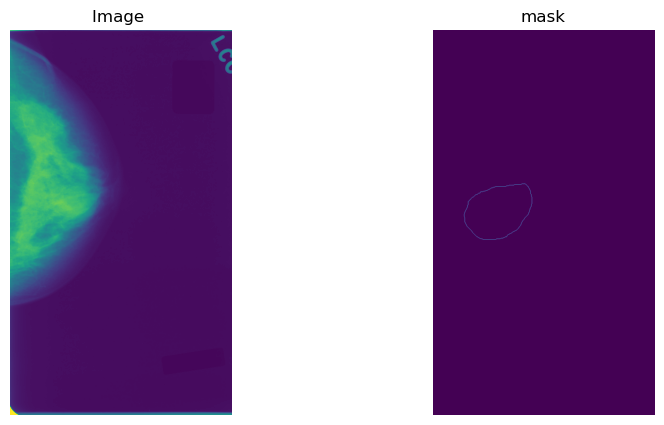

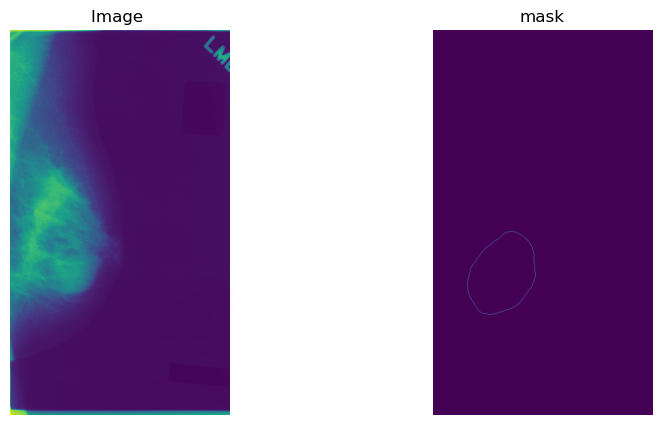

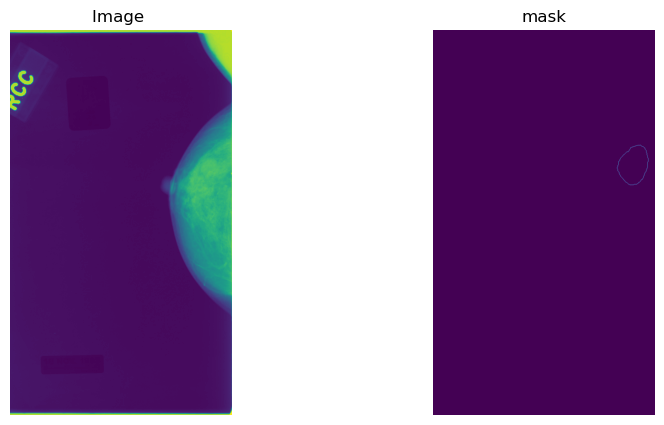

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

x = 3
for index, row in df_final.iterrows():
    if x > 0:
        image_path = row['Tumour_Contour']
        image = Image.open(image_path)

        image_path1 = row['fullPath']
        image1 = Image.open(image_path1)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image1)
        plt.title('Image ')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(image)
        plt.title('mask')
        plt.axis('off')

        plt.show()

        x = x - 1


In [67]:

#image_dir_benign = r'D:\pcd\archive\preprocessed_data\Benign'
#image_dir_cancer = r'D:\pcd\archive\preprocessed_data\Cancer'


for index, row in df_final.iterrows():
        labels= row['labels']
        image_name = row['fileName']
        image_path = row['fullPath']
        mask_filename = row['Tumour_Contour']

        image = cv2.imread(image_path)
        mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)

      
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      
        masked_image = image.copy()
        cv2.drawContours(masked_image, contours, -1, (0, 255, 0), 2)

        if(labels==0):
                
           output_path = os.path.join(image_dir_benign, image_name)  
           cv2.imwrite(output_path, masked_image)
           print(f"Masked image with contours saved as '{output_path}'")
        else:
                output_path = os.path.join(image_dir_cancer, image_name) 
                cv2.imwrite(output_path, masked_image)
                print(f"Masked image with contours saved as '{output_path}'")

Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0029_1.LEFT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0029_1.LEFT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0033_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0033_1.RIGHT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0217_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0217_1.RIGHT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0234_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0234_1.RIGHT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0235_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\preprocessed_data\Benign\C_0235_1.RIGHT_MLO.jp

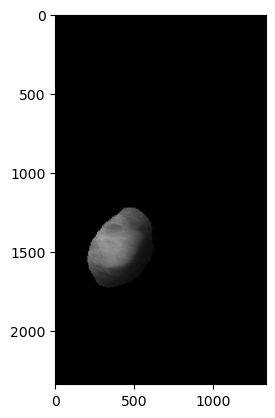

In [33]:

image_path = r'D:\pcd\archive\MINI-DDSM-Complete-JPEG-8\Benign\0029\C_0029_1.LEFT_MLO.jpg'
mask_filename = r'D:\pcd\archive\MINI-DDSM-Complete-JPEG-8\Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg'

    
image = cv2.imread(image_path)
mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)

   
mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_mask = np.zeros_like(mask)
cv2.drawContours(contour_mask, contours, -1, 255, thickness=cv2.FILLED)


masked_contour = cv2.bitwise_and(image, image, mask=contour_mask)



plt.imshow(masked_contour)

cv2.destroyAllWindows()
    

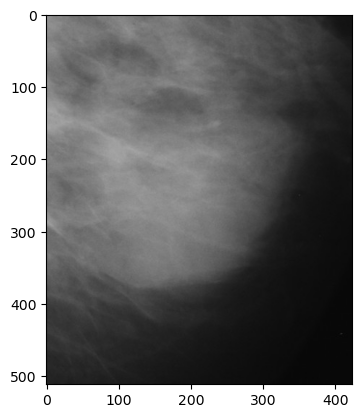

In [32]:



image_path = r'D:\pcd\archive\MINI-DDSM-Complete-JPEG-8\Benign\0029\C_0029_1.LEFT_MLO.jpg'
mask_filename = r'D:\pcd\archive\MINI-DDSM-Complete-JPEG-8\Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg'


image = cv2.imread(image_path)
mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)


mask = cv2.resize(mask, (image.shape[1], image.shape[0]))


contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contour_mask = np.zeros_like(mask)
cv2.drawContours(contour_mask, contours, -1, 255, thickness=cv2.FILLED)


x, y, w, h = cv2.boundingRect(contour_mask)


roi = image[y:y+h, x:x+w]


plt.imshow( roi)

cv2.destroyAllWindows()

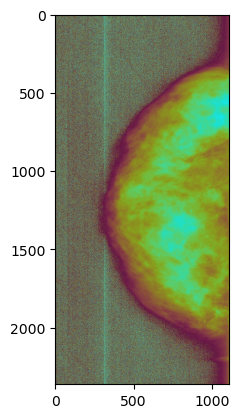

In [35]:



image_path = r'D:\pcd\archive\A_1000_1.LEFT_CC.jpg'
mask_filename = r'D:\pcd\archive\A_1000_1.LEFT_CC_Mask.jpg'


image = cv2.imread(image_path)
mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)


mask = cv2.resize(mask, (image.shape[1], image.shape[0]))


contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contour_mask = np.zeros_like(mask)
cv2.drawContours(contour_mask, contours, -1, 255, thickness=cv2.FILLED)


x, y, w, h = cv2.boundingRect(contour_mask)


roi = image[y:y+h, x:x+w]


plt.imshow( roi)

cv2.destroyAllWindows()

In [37]:

#image_dir_benign = r'D:\pcd\archive\ROI_data\Benign'
#image_dir_cancer = r'D:\pcd\archive\ROI_data\Cancer'


for index, row in df_final.iterrows():
        labels= row['labels']
        image_name = row['fileName']
        image_path = row['fullPath']
        mask_filename = row['Tumour_Contour']

        image = cv2.imread(image_path)
        mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))


        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


        contour_mask = np.zeros_like(mask)
        cv2.drawContours(contour_mask, contours, -1, 255, thickness=cv2.FILLED)


        x, y, w, h = cv2.boundingRect(contour_mask)


        roi = image[y:y+h, x:x+w]
        
        if(labels==0):
                
           output_path = os.path.join(image_dir_benign, image_name)  
           cv2.imwrite(output_path, roi )
           print(f"Masked image with contours saved as '{output_path}'")
        else:
                output_path = os.path.join(image_dir_cancer, image_name) 
                cv2.imwrite(output_path, roi )
                print(f"Masked image with contours saved as '{output_path}'")
        


Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0029_1.LEFT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0029_1.LEFT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0033_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0033_1.RIGHT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0217_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0217_1.RIGHT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0234_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0234_1.RIGHT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0235_1.RIGHT_CC.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0235_1.RIGHT_MLO.jpg'
Masked image with contours saved as 'D:\pcd\archive\ROI_data\Benign\C_0236_1.RIGHT_CC.j

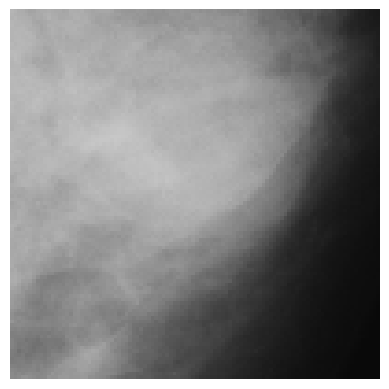

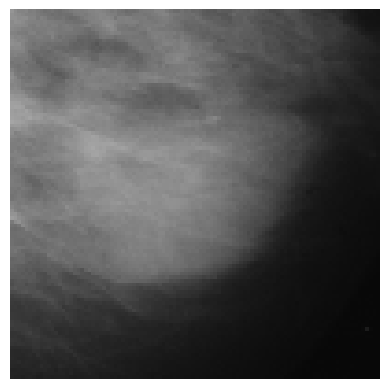

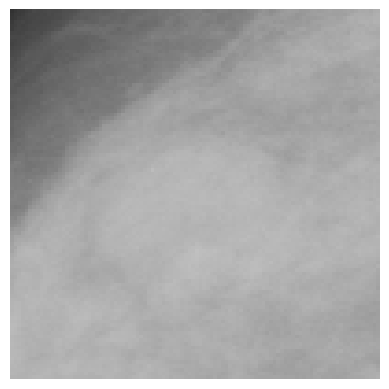

In [48]:

#image_dir_benign = r'D:\pcd\archive\ROI_data\Benign'
#image_dir_cancer = r'D:\pcd\archive\ROI_data\Cancer'

i=3
for index, row in df_final.iterrows():
    if i> 0:
        labels= row['labels']
        image_name = row['fileName']
        image_path = row['fullPath']
        mask_filename = row['Tumour_Contour']

        image = cv2.imread(image_path)
        mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))


        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


        contour_mask = np.zeros_like(mask)
        cv2.drawContours(contour_mask, contours, -1, 255, thickness=cv2.FILLED)


        x, y, w, h = cv2.boundingRect(contour_mask)


        roi = image[y:y+h, x:x+w]
        resized_roi = cv2.resize(roi, (100, 100))
        plt.imshow(  resized_roi)
        plt.axis('off')  # Désactiver les axes
        plt.show()
        
        i=i-1    
     
        

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
original_dataset_dir = r'D:\pcd\archive\ROI_data\Benign'
augmented_dataset_dir = r'D:\pcd\archive\Roi_aug\Benign'
datagen = ImageDataGenerator(
    rotation_range=5,              
    width_shift_range=0.05,        
    height_shift_range=0.05,
    shear_range=0.05,              
    zoom_range=0.05,               
    fill_mode='nearest'           
)
for root, dirs, files in os.walk(original_dataset_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            img = load_img(os.path.join(root, file))  
            x = img_to_array(img)  
            x = x.reshape((1,) + x.shape)  
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dataset_dir, save_prefix='aug', save_format='jpeg'):
                i += 1
                if i >= 5:  
                    break

c:\Users\Mouadh Fraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
original_dataset_dir = r'D:\pcd\archive\ROI_data\Cancer'
augmented_dataset_dir = r'D:\pcd\archive\Roi_aug\Cancer'
datagen = ImageDataGenerator(
    rotation_range=5,              
    width_shift_range=0.05,        
    height_shift_range=0.05,
    shear_range=0.05,              
    zoom_range=0.05,               
    fill_mode='nearest'           
)
for root, dirs, files in os.walk(original_dataset_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            img = load_img(os.path.join(root, file))  
            x = img_to_array(img)  
            x = x.reshape((1,) + x.shape)  
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dataset_dir, save_prefix='aug', save_format='jpeg'):
                i += 1
                if i >= 5:  
                    break